In [2]:
%matplotlib inline
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn import decomposition, preprocessing
from sklearn.decomposition import FactorAnalysis, PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import cross_val_score
from sklearn.pipeline import Pipeline
from IPython.display import display
import matplotlib.cm as cm

plt.rcParams['figure.figsize'] = (12.0, 10.0)


/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
df = pd.read_csv('all.csv')

In [4]:
df.columns

Index(['benchmark', 'machine', 'repetition', 'subtest', 'test', 'result'], dtype='object')

In [5]:
df.benchmark.unique()

array(['stressng', 'mysqlslap', 'stream'], dtype=object)

In [6]:
# there's 'subtest' field that denotes the number of cycles for the STREAM benchmark
df['test'] = df.apply(lambda x: x['test'] if x['benchmark'] != 'stream' else x['test'] + '-' + str(x['subtest']), axis=1)

In [7]:
df

,benchmark,machine,repetition,subtest,test,result
0,stressng,c220g1.quiho2.schedock-PG0.wisc.cloudlab.us,1,stressng,af-alg,8.105660e+03
1,stressng,c220g1.quiho2.schedock-PG0.wisc.cloudlab.us,1,stressng,atomic,7.112296e+05
2,stressng,c220g1.quiho2.schedock-PG0.wisc.cloudlab.us,1,stressng,bigheap,3.730450e+04
3,stressng,c220g1.quiho2.schedock-PG0.wisc.cloudlab.us,1,stressng,brk,6.860020e+05
4,stressng,c220g1.quiho2.schedock-PG0.wisc.cloudlab.us,1,stressng,bsearch,3.803744e+02
5,stressng,c220g1.quiho2.schedock-PG0.wisc.cloudlab.us,1,stressng,cache,2.999999e+00
6,stressng,c220g1.quiho2.schedock-PG0.wisc.cloudlab.us,1,stressng,cpu,2.715141e+02
7,stressng,c220g1.quiho2.schedock-PG0.wisc.cloudlab.us,1,stressng,crypt,1.649888e+02
8,stressng,c220g1.quiho2.schedock-PG0.wisc.cloudlab.us,1,stressng,full,3.109110e+05
9,stressng,c220g1.quiho2.schedock-PG0.wisc.cloudlab.us,1,stressng,heapsort,4.600001e+00


In [8]:
df['machine+repetition'] = df.apply(lambda x: x['machine'] + '-' + str(x['repetition']), axis=1) 

In [9]:
len(df.index)

6708

In [10]:
df.dropna(inplace=True)

In [11]:
len(df.index)

6603

In [11]:
df.test.unique()

array(['af-alg', 'atomic', 'bigheap', 'brk', 'bsearch', 'cache', 'cpu',
       'crypt', 'full', 'heapsort', 'hsearch', 'icache', 'lockbus',
       'longjmp', 'lsearch', 'malloc', 'matrix', 'memcpy', 'mincore',
       'mmap', 'mremap', 'msync', 'nop', 'numa', 'oom-pipe', 'opcode',
       'qsort', 'remap', 'resources', 'rmap', 'shm', 'shm-sysv', 'stack',
       'stackmmap', 'str', 'stream', 'tsearch', 'vecmath', 'vm', 'vm-rw',
       'vm-splice', 'zero', 'innodb_key', 'innodb_load', 'innodb_mixed',
       'innodb_scan', 'innodb_update', 'memory_key', 'memory_load',
       'memory_mixed', 'memory_scan', 'memory_update', 'stream-1',
       'stream-10', 'stream-12', 'stream-14', 'stream-16', 'stream-18',
       'stream-2', 'stream-20', 'stream-4', 'stream-6', 'stream-8'], dtype=object)

In [12]:
# pivot table to obtain features, where each microbenchmark is a feature
features = df.pivot_table(index=["machine+repetition","test"], values=['result'], fill_value=0, aggfunc=np.mean).unstack().reset_index()

In [13]:
# flatten the index
cols = features.columns.get_level_values(1).values
cols[0] = 'machine+repetition'
features.columns = cols
features.dropna(inplace=True)

In [20]:
# get features that we'll use
feature_columns = list(pd.Index(df.query('benchmark == "stressng"')['test'].unique()))

In [21]:
feature_columns

['af-alg',
 'atomic',
 'bigheap',
 'brk',
 'bsearch',
 'cache',
 'cpu',
 'crypt',
 'full',
 'heapsort',
 'hsearch',
 'icache',
 'lockbus',
 'longjmp',
 'lsearch',
 'malloc',
 'matrix',
 'memcpy',
 'mincore',
 'mmap',
 'mremap',
 'msync',
 'nop',
 'numa',
 'oom-pipe',
 'opcode',
 'qsort',
 'remap',
 'resources',
 'rmap',
 'shm',
 'shm-sysv',
 'stack',
 'stackmmap',
 'str',
 'stream',
 'tsearch',
 'vecmath',
 'vm',
 'vm-rw',
 'vm-splice',
 'zero']

In [22]:
# what we can learn
features.columns.difference(feature_columns + ['machine+repetition'])

Index(['innodb_key', 'innodb_load', 'innodb_mixed', 'innodb_scan',
       'innodb_update', 'memory_key', 'memory_load', 'memory_mixed',
       'memory_scan', 'memory_update', 'stream-1', 'stream-10', 'stream-12',
       'stream-14', 'stream-16', 'stream-18', 'stream-2', 'stream-20',
       'stream-4', 'stream-6', 'stream-8'],
      dtype='object')

In [23]:
features[feature_columns]

,af-alg,atomic,bigheap,brk,bsearch,cache,cpu,crypt,full,heapsort,...,stack,stackmmap,str,stream,tsearch,vecmath,vm,vm-rw,vm-splice,zero
0,8105.659587,711229.604415,37304.503500,686002.043277,380.374362,2.999999,271.514117,164.988813,310910.994015,4.600001,...,0.0,5.296900,21689.656171,11.349995,16.186169,1000.970169,34706.729604,126.791113,627125.331523,762500.826653
1,8386.058363,716326.866506,38041.101873,709002.877977,358.838718,2.799984,277.367664,163.731381,317314.417338,4.599988,...,0.0,5.499167,21270.278604,10.739701,16.554634,1012.208898,34704.228525,122.827114,625342.997851,758824.753552
2,7982.812040,700526.594277,36286.146007,678798.706049,384.447864,3.199996,263.313294,167.333100,282775.713542,4.800008,...,0.0,5.398602,21491.982930,11.050531,16.370280,1038.290965,34703.186240,130.775362,610299.983466,730482.076380
3,7806.720030,721277.702330,36998.785742,678672.136760,382.080934,2.999983,276.940634,163.944519,315706.971003,4.699999,...,0.0,5.498932,21740.484488,10.447829,16.171696,1002.040584,34701.048183,127.477397,619267.386503,754864.801374
4,7460.316410,733986.734921,36321.821563,706856.504652,381.044855,3.099992,270.992811,167.636551,278842.152072,4.899997,...,0.0,5.399585,20873.562706,10.604329,16.142032,976.230593,34696.854590,127.947848,625093.964857,697038.244962
5,8256.758007,701922.382443,37800.807510,707106.605333,384.460328,3.299986,277.771111,162.318808,304230.470986,4.799990,...,0.0,5.499745,21175.439847,8.987113,16.089029,992.388288,34703.442263,129.175183,608365.507562,759242.558316
6,7970.341957,692027.704289,37045.062751,694185.791382,366.780482,3.199979,278.393821,167.314869,307805.458709,4.900002,...,0.0,5.398683,20788.433326,11.003290,17.669127,1023.084145,34695.120147,131.421303,600680.446455,766542.908605
7,8244.064061,690089.429707,37260.108208,711091.665504,384.434457,3.099974,277.488892,168.004388,315759.790603,4.799993,...,0.0,5.097735,21457.966508,11.258110,16.286534,1028.199167,34697.207939,128.754396,625507.355149,711399.421543
8,7810.209746,712721.629204,36482.663317,715769.850985,378.049146,3.099984,277.120046,167.108643,301026.474162,4.499989,...,0.0,5.498279,21710.337168,10.525432,16.860094,1011.459438,34699.670023,127.365841,605434.347147,759882.657498
9,8299.670739,724716.024394,37196.556586,708095.032502,379.516737,3.099980,277.782749,162.539616,318699.594441,4.499999,...,0.0,5.399128,21470.157843,10.259508,16.785439,1039.818263,34702.184483,125.947066,633065.014951,755505.354707


In [24]:
def plot_corrmatrix(dataf):
    corrmatrix = dataf.corr()
    mask = np.zeros_like(corrmatrix)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corrmatrix, mask=mask,
                xticklabels=corrmatrix.columns.values,
                yticklabels=corrmatrix.columns.values)
    return corrmatrix

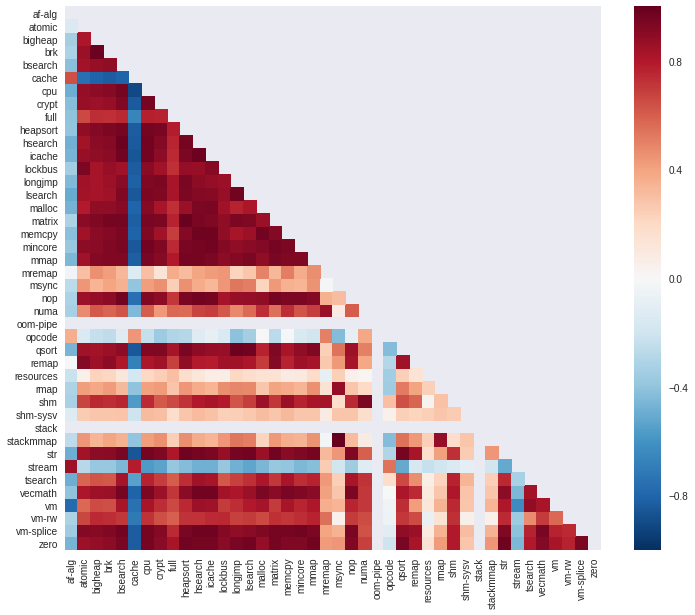

In [25]:
# plot correlation matrix for all stressors
corrmatrix = plot_corrmatrix(features[feature_columns])

In [104]:
["{} = {}".format(i, np.mean(np.abs(corrmatrix[i])) < .5) for i in corrmatrix.columns]

['atomic = False',
 'bigheap = False',
 'brk = False',
 'bsearch = False',
 'cpu = False',
 'crypt = False',
 'full = False',
 'heapsort = False',
 'hsearch = False',
 'lockbus = False',
 'longjmp = False',
 'lsearch = False',
 'malloc = False',
 'matrix = False',
 'memcpy = False',
 'mincore = False',
 'mmap = False',
 'mremap = True',
 'msync = True',
 'nop = False',
 'numa = False',
 'qsort = False',
 'remap = False',
 'resources = True',
 'rmap = True',
 'shm = False',
 'shm-sysv = True',
 'stackmmap = True',
 'str = False',
 'stream = True',
 'tsearch = False',
 'vecmath = False',
 'vm = False',
 'vm-rw = False',
 'vm-splice = False',
 'zero = False']

In [52]:
cpu_stressors = ['af-alg', 'atomic', 'bsearch', 'context', 'cpu', 'cpu-online', 'crypt', 'fp-error', 'getrandom', 'heapsort', 'hsearch', 'longjmp', 'lsearch', 'matrix', 'mergesort', 'nop', 'numa', 'opcode', 'qsort', 'rdrand', 'str', 'stream', 'tsc', 'tsearch', 'vecmath', 'wcs', 'zlib']
memory_stressors = ['atomic', 'bsearch', 'context', 'full', 'heapsort', 'hsearch', 'lockbus', 'lsearch', 'malloc', 'matrix', 'membarrier', 'memcpy', 'memfd', 'mergesort', 'mincore', 'null', 'numa', 'oom-pipe', 'pipe', 'qsort', 'remap', 'resources', 'rmap', 'stack', 'stackmmap', 'str', 'stream', 'tlb-shootdown', 'tmpfs', 'tsearch', 'vm', 'vm-rw', 'wcs', 'zero', 'zlib']
vm_stressors = ['bigheap', 'brk', 'madvise', 'malloc', 'mlock', 'mmap', 'mmapfork', 'mmapmany', 'mremap', 'msync', 'shm', 'shm-sysv', 'stack', 'stackmmap', 'tmpfs', 'userfaultfd', 'vm', 'vm-rw', 'vm-splice']

In [106]:
memory_stressors

['mremap', 'msync', 'rmap', 'shm-sysv', 'stackmmap', 'stream']

In [107]:
cpu_stressors

['atomic',
 'bigheap',
 'brk',
 'bsearch',
 'cpu',
 'crypt',
 'full',
 'heapsort',
 'hsearch',
 'lockbus',
 'longjmp',
 'lsearch',
 'malloc',
 'matrix',
 'memcpy',
 'mincore',
 'mmap',
 'nop',
 'numa',
 'qsort',
 'remap',
 'resources',
 'shm',
 'str',
 'tsearch',
 'vecmath',
 'vm',
 'vm-rw',
 'vm-splice',
 'zero']

In [121]:
rs = np.random.RandomState(1)
z_scaler = StandardScaler()

def cross_validate_by_machine(data, feats, apps, normalize=False):
    out = []
    
    for machine in df['machine'].unique():

        data_without = data[data['machine+repetition'].str.startswith(machine) == False]
        data_machine = data[data['machine+repetition'].str.startswith(machine) == True]
        
        if normalize:
            X_train = data_without[feats]
            X_test = data_machine[feats]
        else:
            X_train = z_scaler.fit_transform(data_without[feats])
            X_test = z_scaler.fit_transform(data_machine[feats])

        for app in apps:            
            y_train = data_without[app]
            y_actual = data_machine[app]
            
            print(machine + ',' + app)
            
            # random forest regression
            regr = RandomForestRegressor(max_depth=6, n_estimators=1000, random_state=rs, n_jobs=-1)
            regr.fit(X_train, y_train)
            out += get_prediction_for_machine(regr, 'random_forest', X_test, y_actual, machine, app)
            
            # pipeline (PCA + random forest regression)
            pca = PCA(n_components=7)
            pipe = Pipeline([('pca', pca), ('randomforest', regr)])
            pipe.fit(X_train, y_train)
            out += get_prediction_for_machine(pipe, 'pca+random_forest', X_test, y_actual, machine, app)
            
    return pd.DataFrame(out) 

def get_prediction_for_machine(predictor, method, X_test, y_actual, machine, app):
    y_pred = predictor.predict(X_test)
    out = []
    i = 1
    for y_a, y_p in zip(y_actual, y_pred):
        out += [{
            'machine': machine,
            'repetition': i,
            'app': app,
            'method': method,
            'actual': y_a,
            'predicted': y_p
        }]
        i += 1
    return out

def plot_importance(data, feats, apps):
    for b in apps:
        # normalize data
        z_data = z_scaler.fit_transform(data[feats])
        
        # fit using random forest regressor
        regr = RandomForestRegressor(max_depth=6, n_estimators=1000, random_state=rs, n_jobs=-1)
        regr.fit(z_data, data[b])

        # taken from https://stackoverflow.com/a/39960628/389188
        # {
        importances = pd.DataFrame({'feature':data[feats].columns,'importance':np.round(regr.feature_importances_,3)})
        importances = importances.sort_values('importance',ascending=False).set_index('feature')

        #importances.plot.bar()
        plt.title("Feature importances (" + b + ")")
        plt.show()
        # }

        # print aggregate importance for each class
        print(b)
        print('CPU: {}'.format(importances.query('feature in @cpu_stressors')['importance'].sum()))
        print('MEM: {}'.format(importances.query('feature in @memory_stressors')['importance'].sum()))
        print('VM: {}'.format(importances.query('feature in @vm_stressors')['importance'].sum()))
        print('')
        

In [122]:
apps = features.columns.difference(feature_columns + ['machine+repetition', 'innodb_key', 'innodb_mixed', 'innodb_scan', 'innodb_update', 'memory_key', 'memory_mixed', 'memory_scan', 'memory_update'])

cv = cross_validate_by_machine(features, feature_columns, apps)
cv_norm = cross_validate_by_machine(features, feature_columns, apps, normalize=True)

c220g1.quiho2.schedock-PG0.wisc.cloudlab.us,innodb_load
c220g1.quiho2.schedock-PG0.wisc.cloudlab.us,memory_load
c220g1.quiho2.schedock-PG0.wisc.cloudlab.us,stream-1
c220g1.quiho2.schedock-PG0.wisc.cloudlab.us,stream-10
c220g1.quiho2.schedock-PG0.wisc.cloudlab.us,stream-12
c220g1.quiho2.schedock-PG0.wisc.cloudlab.us,stream-14
c220g1.quiho2.schedock-PG0.wisc.cloudlab.us,stream-16
c220g1.quiho2.schedock-PG0.wisc.cloudlab.us,stream-18
c220g1.quiho2.schedock-PG0.wisc.cloudlab.us,stream-2
c220g1.quiho2.schedock-PG0.wisc.cloudlab.us,stream-20
c220g1.quiho2.schedock-PG0.wisc.cloudlab.us,stream-4
c220g1.quiho2.schedock-PG0.wisc.cloudlab.us,stream-6
c220g1.quiho2.schedock-PG0.wisc.cloudlab.us,stream-8
c220g2.quiho2.schedock-PG0.wisc.cloudlab.us,innodb_load
c220g2.quiho2.schedock-PG0.wisc.cloudlab.us,memory_load
c220g2.quiho2.schedock-PG0.wisc.cloudlab.us,stream-1
c220g2.quiho2.schedock-PG0.wisc.cloudlab.us,stream-10
c220g2.quiho2.schedock-PG0.wisc.cloudlab.us,stream-12
c220g2.quiho2.schedock-PG0

m510.quiho2.schedock-PG0.utah.cloudlab.us,stream-8
pc3000.quiho2.Schedock.emulab.net,innodb_load
pc3000.quiho2.Schedock.emulab.net,memory_load
pc3000.quiho2.Schedock.emulab.net,stream-1
pc3000.quiho2.Schedock.emulab.net,stream-10
pc3000.quiho2.Schedock.emulab.net,stream-12
pc3000.quiho2.Schedock.emulab.net,stream-14
pc3000.quiho2.Schedock.emulab.net,stream-16
pc3000.quiho2.Schedock.emulab.net,stream-18
pc3000.quiho2.Schedock.emulab.net,stream-2
pc3000.quiho2.Schedock.emulab.net,stream-20
pc3000.quiho2.Schedock.emulab.net,stream-4
pc3000.quiho2.Schedock.emulab.net,stream-6
pc3000.quiho2.Schedock.emulab.net,stream-8
pc3300.quiho2.emulab-net.uky.emulab.net,innodb_load
pc3300.quiho2.emulab-net.uky.emulab.net,memory_load
pc3300.quiho2.emulab-net.uky.emulab.net,stream-1
pc3300.quiho2.emulab-net.uky.emulab.net,stream-10
pc3300.quiho2.emulab-net.uky.emulab.net,stream-12
pc3300.quiho2.emulab-net.uky.emulab.net,stream-14
pc3300.quiho2.emulab-net.uky.emulab.net,stream-16
pc3300.quiho2.emulab-net.

d2100.quiho2.Schedock.emulab.net,stream-4
d2100.quiho2.Schedock.emulab.net,stream-6
d2100.quiho2.Schedock.emulab.net,stream-8
d430.quiho2.Schedock.emulab.net,innodb_load
d430.quiho2.Schedock.emulab.net,memory_load
d430.quiho2.Schedock.emulab.net,stream-1
d430.quiho2.Schedock.emulab.net,stream-10
d430.quiho2.Schedock.emulab.net,stream-12
d430.quiho2.Schedock.emulab.net,stream-14
d430.quiho2.Schedock.emulab.net,stream-16
d430.quiho2.Schedock.emulab.net,stream-18
d430.quiho2.Schedock.emulab.net,stream-2
d430.quiho2.Schedock.emulab.net,stream-20
d430.quiho2.Schedock.emulab.net,stream-4
d430.quiho2.Schedock.emulab.net,stream-6
d430.quiho2.Schedock.emulab.net,stream-8
d530.quiho2.Schedock.emulab.net,innodb_load
d530.quiho2.Schedock.emulab.net,memory_load
d530.quiho2.Schedock.emulab.net,stream-1
d530.quiho2.Schedock.emulab.net,stream-10
d530.quiho2.Schedock.emulab.net,stream-12
d530.quiho2.Schedock.emulab.net,stream-14
d530.quiho2.Schedock.emulab.net,stream-16
d530.quiho2.Schedock.emulab.net,

scruffy.soe.ucsc.edu,stream-1
scruffy.soe.ucsc.edu,stream-10
scruffy.soe.ucsc.edu,stream-12
scruffy.soe.ucsc.edu,stream-14
scruffy.soe.ucsc.edu,stream-16
scruffy.soe.ucsc.edu,stream-18
scruffy.soe.ucsc.edu,stream-2
scruffy.soe.ucsc.edu,stream-20
scruffy.soe.ucsc.edu,stream-4
scruffy.soe.ucsc.edu,stream-6
scruffy.soe.ucsc.edu,stream-8


In [125]:
cv.head(1)

,actual,app,machine,method,predicted,repetition
0,172.45,innodb_load,c220g1.quiho2.schedock-PG0.wisc.cloudlab.us,random_forest,173.767311,1


In [161]:
cv['ae'] = np.abs(cv['actual'] - cv['predicted'])
cv['ape'] = 100 * np.abs((cv['actual'] - cv['predicted']) / cv['actual'])

In [162]:
cv_norm['ae'] = np.abs(cv_norm['actual'] - cv_norm['predicted'])
cv_norm['ape'] = 100 * np.abs((cv_norm['actual'] - cv_norm['predicted']) / cv_norm['actual'])

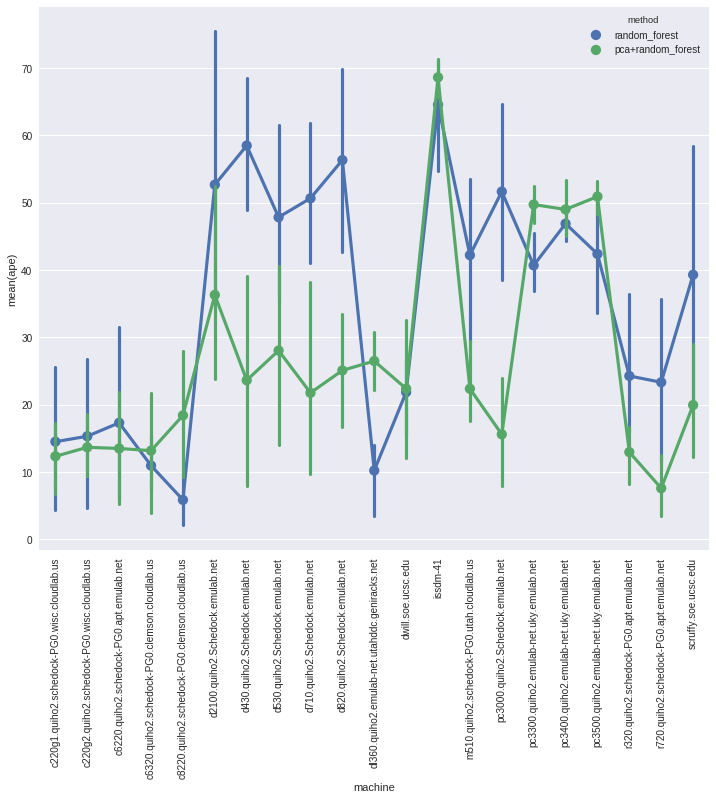

In [166]:
g = sns.pointplot(x='machine', y='ape', hue='method', data=cv.query('app == "stream-1"'))
_ = plt.xticks(rotation=90)
#g.set_yscale('log')

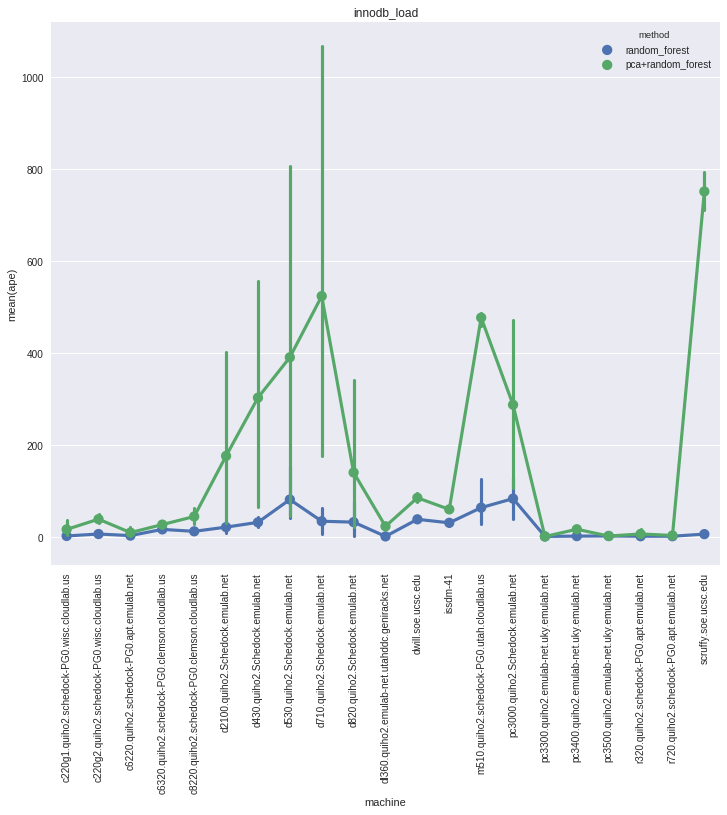

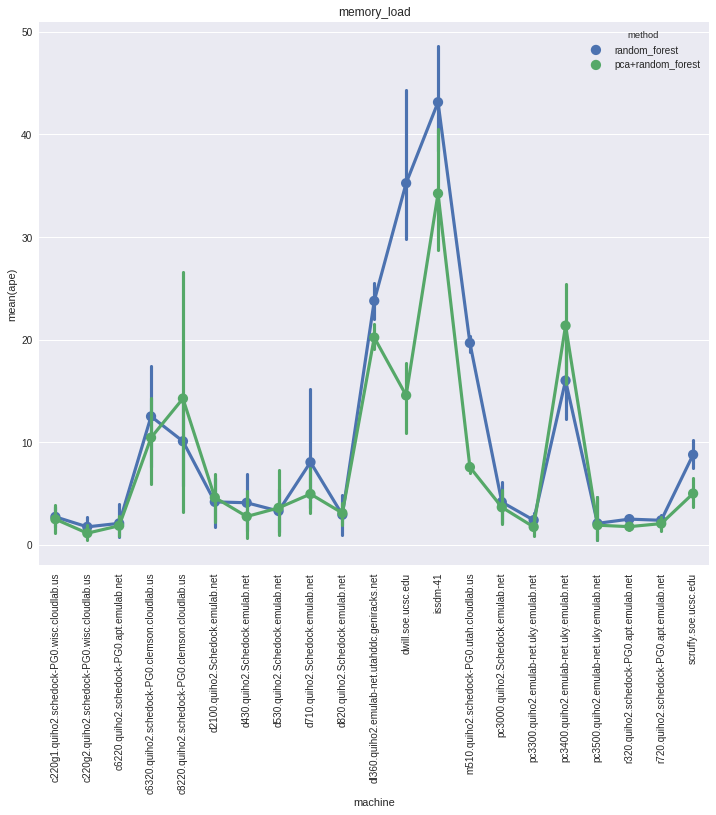

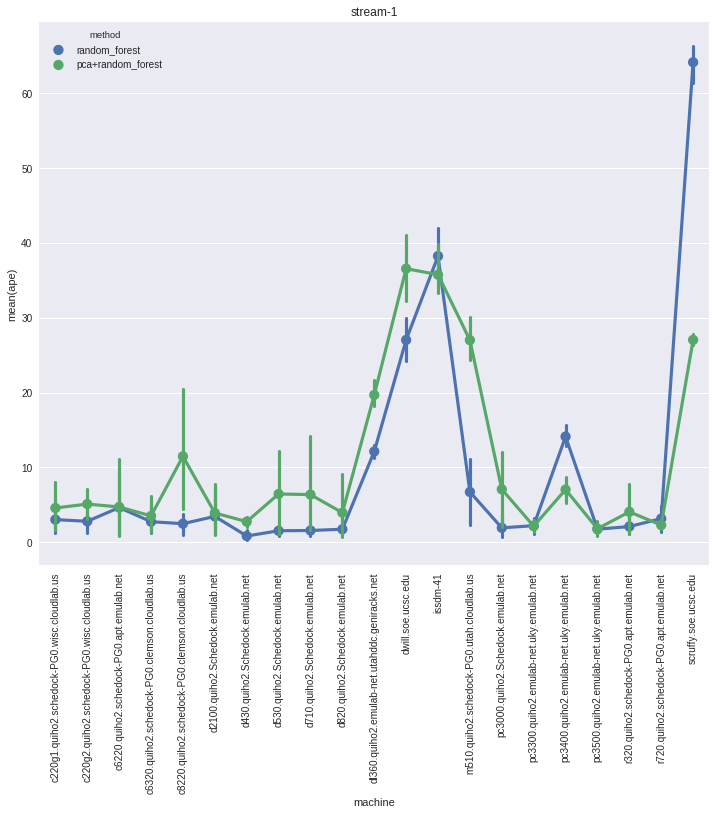

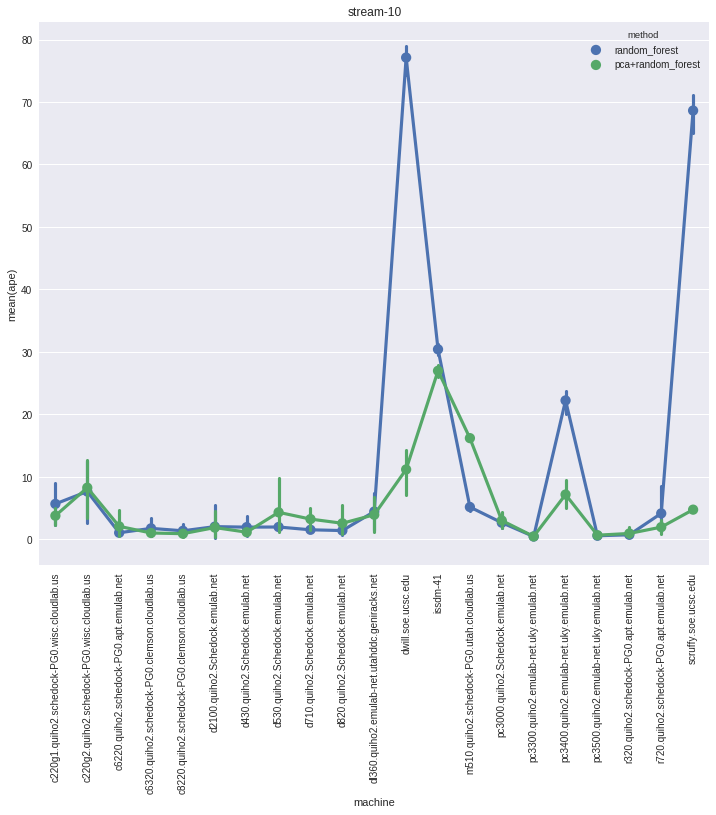

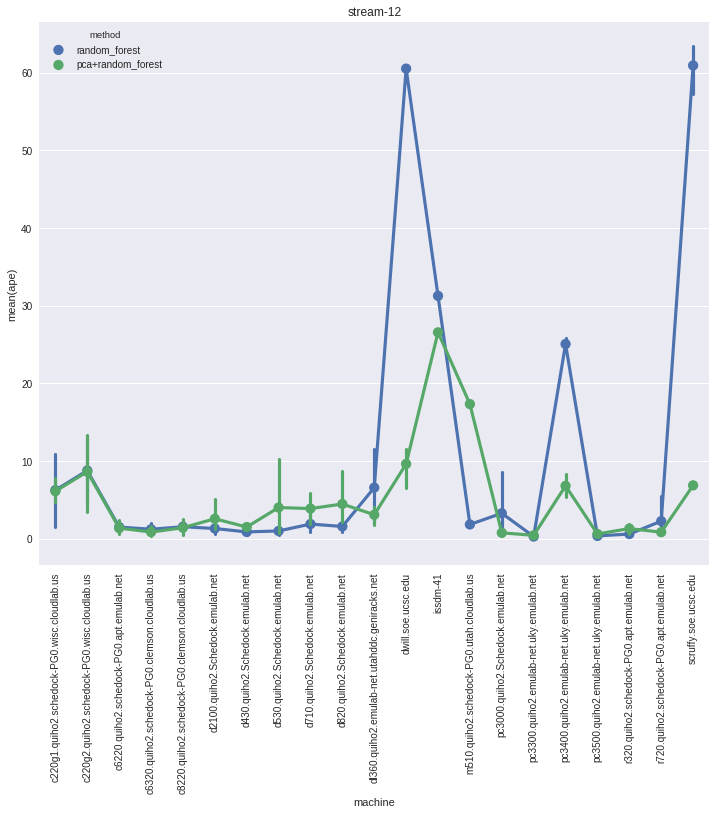

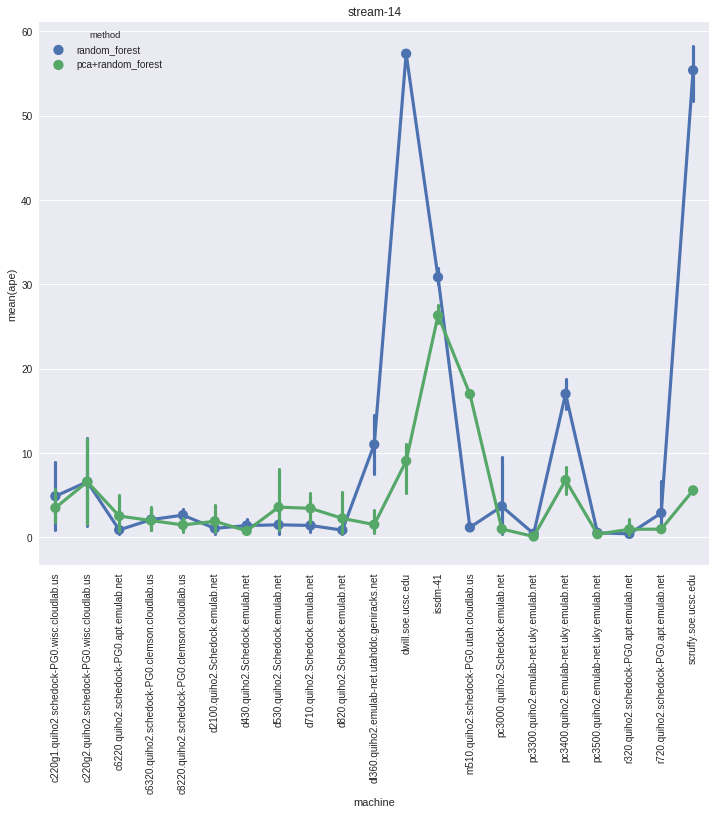

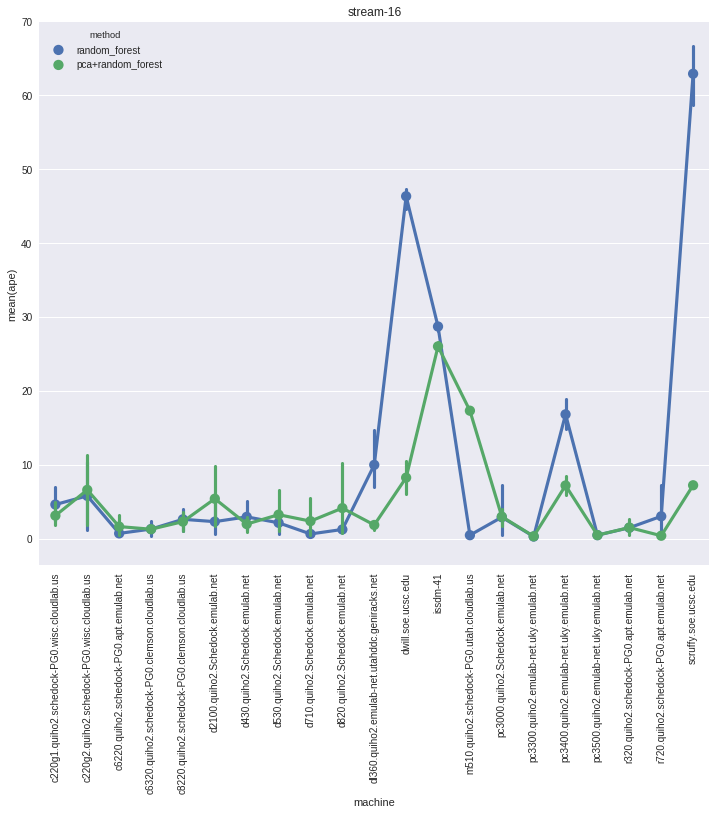

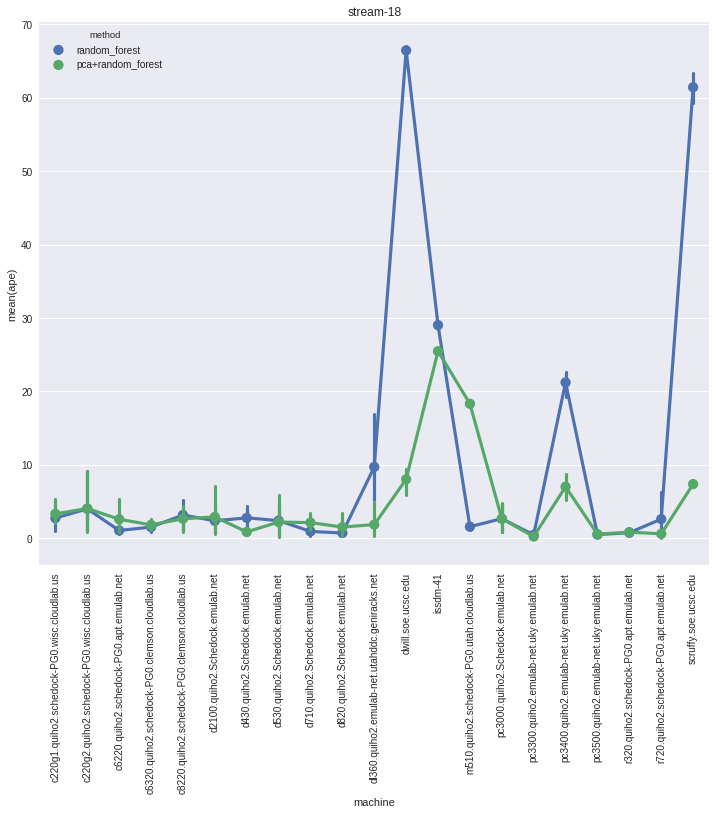

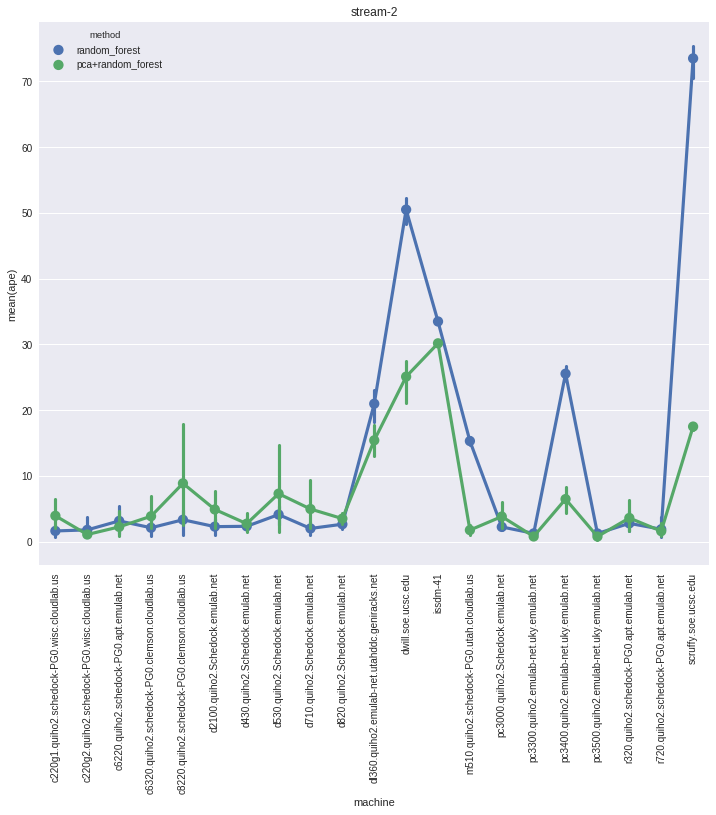

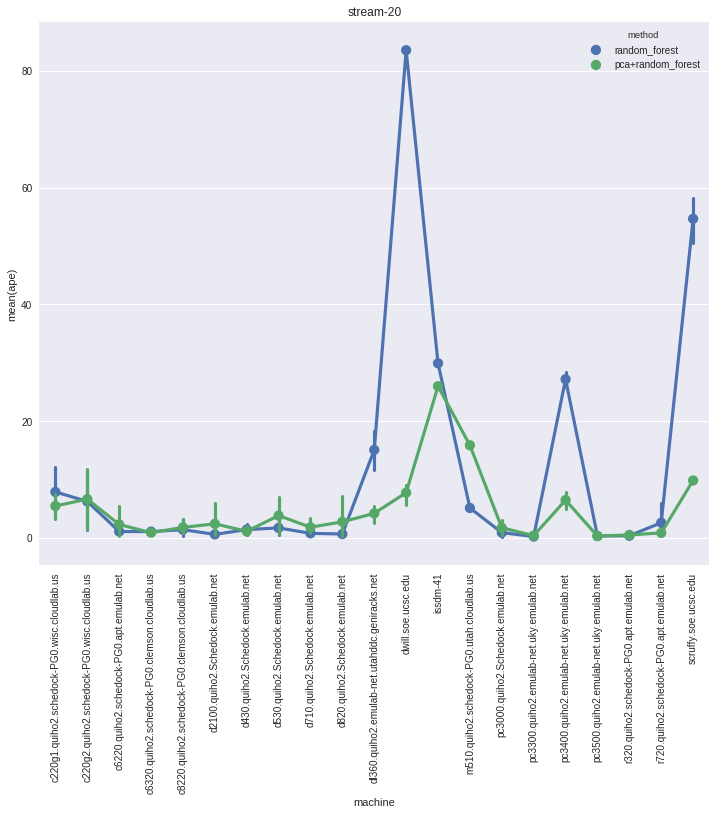

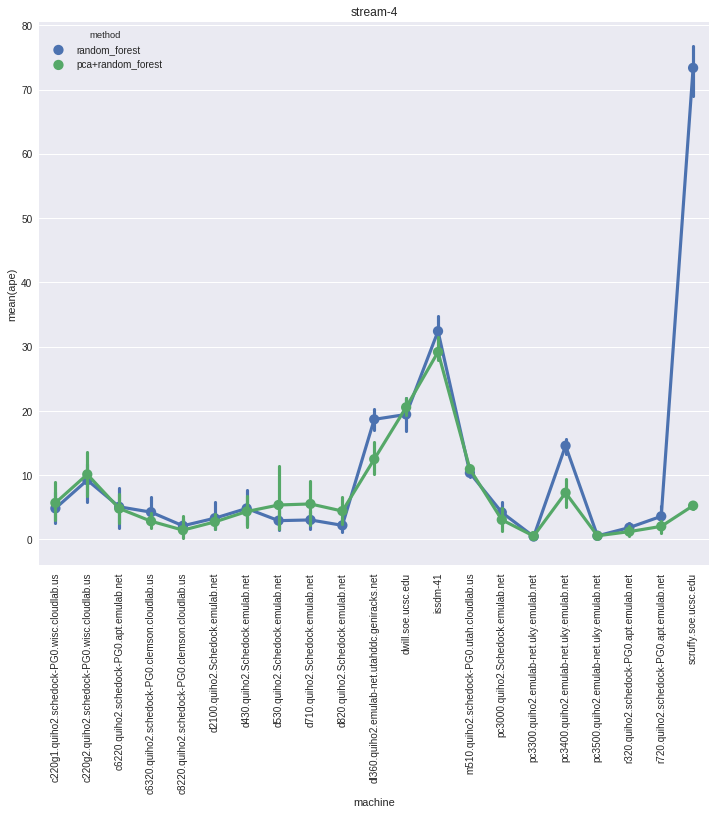

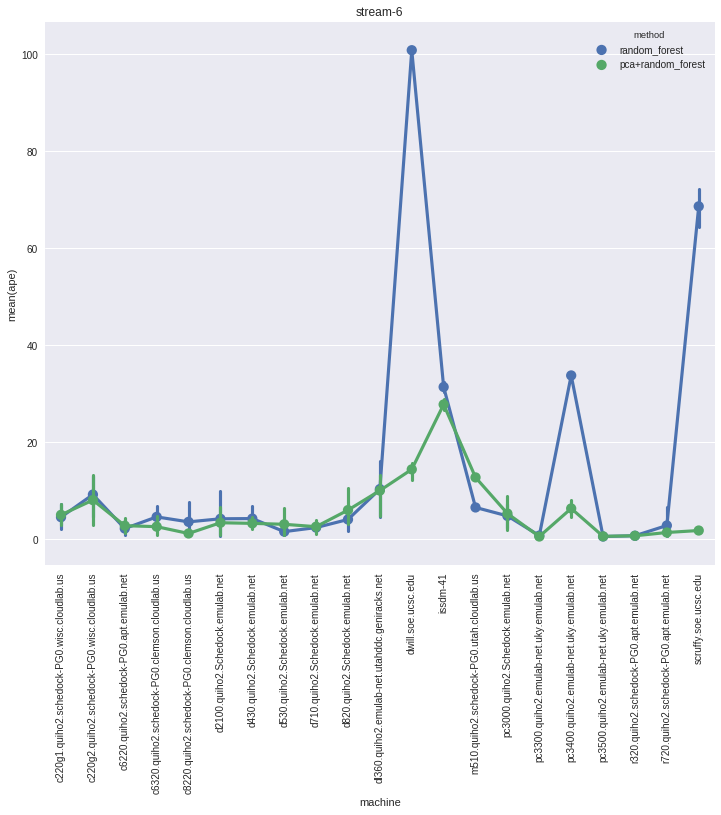

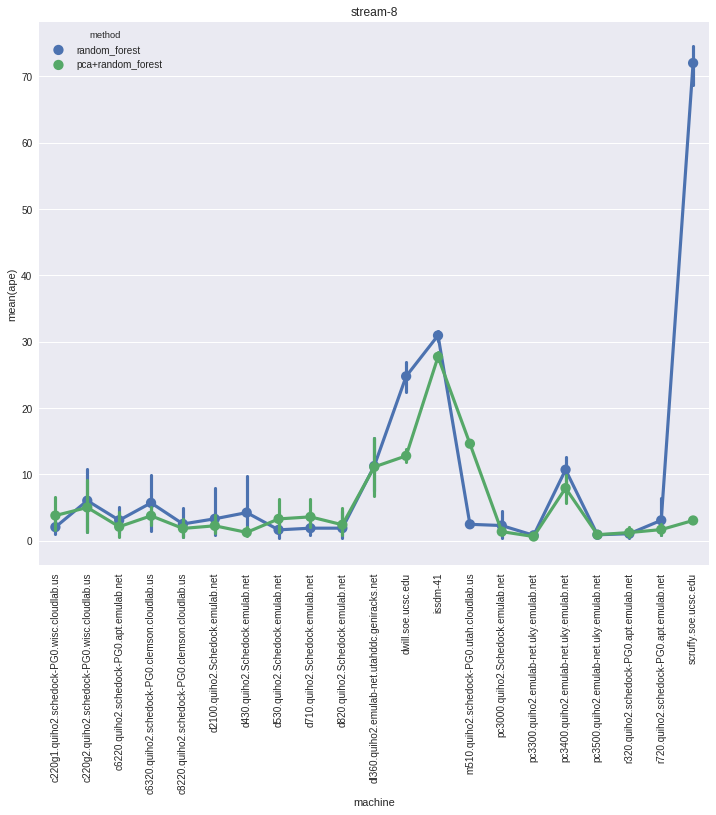

In [169]:
for app in cv_norm['app'].unique():
    g = sns.pointplot(x='machine', y='ape', hue='method', data=cv_norm.query('app == "{}"'.format(app)))
    plt.title(app)
    _ = plt.xticks(rotation=90)
    #g.set_yscale('log')
    plt.show()

In [45]:
plot_importance(features, feature_columns, apps)

PCA+RF
prediction: [ 2.11679426  2.11808057  2.11688307  2.11634741  2.12011293]
actual: [1.6721099999999998, 1.6488099999999999, 1.6716900000000001, 1.6819299999999999, 1.6687000000000001]
PCA+RF
prediction: [ 2.96391155  2.96490996  2.96533968  2.96527124  2.96638212]
actual: [2.5020099999999998, 2.51152, 2.5122200000000001, 2.5381800000000001, 2.5064000000000002]
PCA+RF
prediction: [ 4.37353149  4.37133486  4.37266634  4.37324101  4.37985371]
actual: [4.1332399999999998, 4.1835900000000006, 4.15245, 4.14689, 4.1527500000000002]
PCA+RF
prediction: [ 5.89289743  5.892645    5.89417382  5.89426529  5.8953466 ]
actual: [5.7932300000000003, 5.8520400000000006, 5.78674, 5.8191800000000002, 5.77461]
PCA+RF
prediction: [ 7.2689125   7.25062791  7.25109677  7.24950747  7.25216418]
actual: [7.4759600000000006, 7.4560100000000009, 7.4881699999999993, 7.4759100000000007, 7.4908100000000006]
PCA+RF
prediction: [ 8.66929143  8.66977907  8.67166072  8.66987597  8.67201413]
actual: [9.1353799999999

(0.0001, 100)

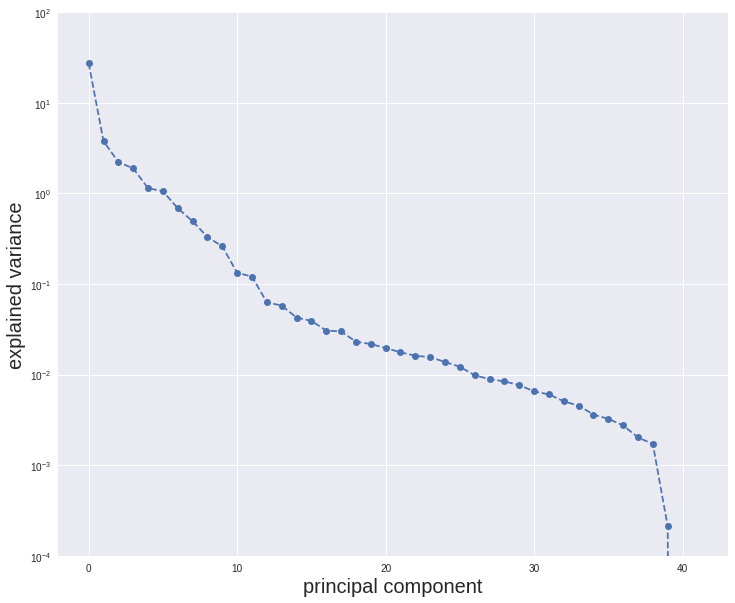

In [83]:
# taken from http://jotterbach.github.io/2016/03/24/Principal_Component_Analysis/
#            https://github.com/jotterbach/Data-Exploration-and-Numerical-Experimentation/blob/master/Data-Analytics/PCA_Pitfalls.ipynb
z_scaler = StandardScaler()
z_data = z_scaler.fit_transform(features[feature_columns])
pca_stressors_norm = PCA().fit(z_data)
plt.semilogy(pca_stressors_norm.explained_variance_, '--o')
plt.xlabel('principal component', fontsize = 20);
plt.ylabel('explained variance', fontsize = 20);
plt.ylim([.0001,100])

(0.0001, 10)

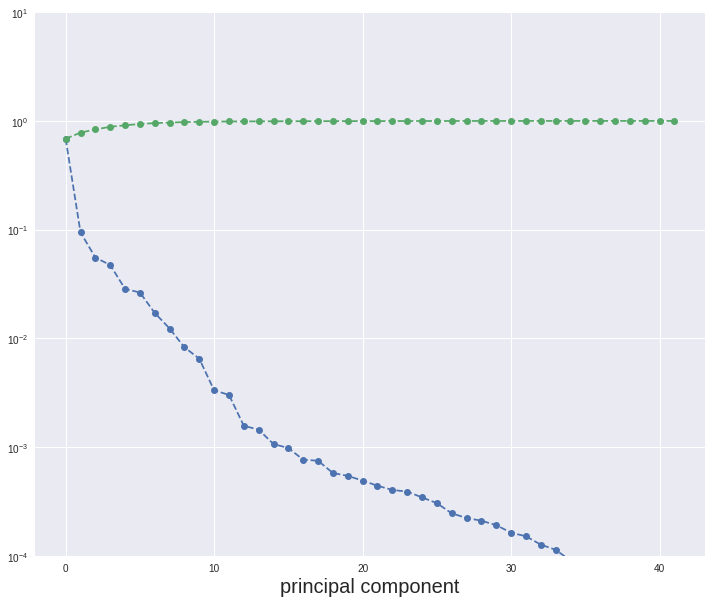

In [82]:
plt.semilogy(pca_stressors_norm.explained_variance_ratio_, '--o');
plt.semilogy(pca_stressors_norm.explained_variance_ratio_.cumsum(), '--o');
plt.xlabel('principal component', fontsize = 20);
plt.ylim([.0001,10])

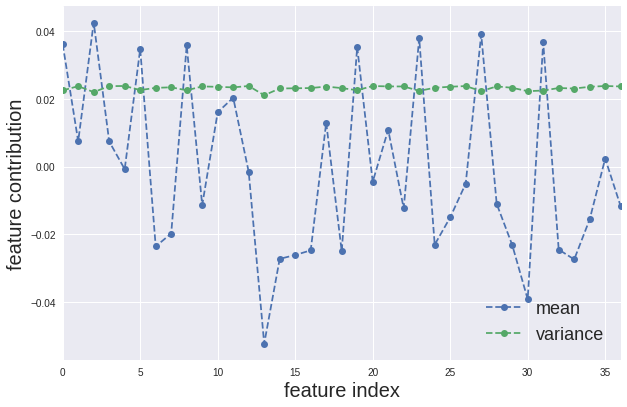

In [35]:
n_comp = len(feature_columns)
pca_inv_data = pca_stressors_norm.inverse_transform(np.eye(n_comp))
fig = plt.figure(figsize=(10, 6.5))
plt.plot(pca_inv_data.mean(axis=0), '--o', label = 'mean')
plt.plot(np.square(pca_inv_data.std(axis=0)), '--o', label = 'variance')
plt.legend(loc='lower right')
plt.ylabel('feature contribution', fontsize=20);
plt.xlabel('feature index', fontsize=20);
plt.tick_params(axis='both', which='major');
plt.tick_params(axis='both', which='minor');
plt.xlim([0, 36])
plt.legend(loc='lower right', fontsize=18)

In [36]:
# show indices where mean of variance is greater than a threshold
mean_threshold=0.03
np.where(np.abs(pca_inv_data.mean(axis=0)) > mean_threshold)

(array([ 0,  2,  5,  8, 13, 19, 23, 27, 30, 31]),)

In [37]:
# show which stressors they correspond to
most_relevant = list(np.array(feature_columns)[np.where(np.abs(pca_inv_data.mean(axis=0)) > mean_threshold)])
most_relevant

['af-alg',
 'bigheap',
 'cache',
 'full',
 'longjmp',
 'mmap',
 'numa',
 'remap',
 'shm',
 'shm-sysv']

In [57]:
# let's plot feature importance again, this time using only the most relevant features from above
plot_importance(features, most_relevant, ['stream-1','stream-2', 'stream-4', 'stream-6', 'stream-8', 'stream-10', 'stream-12', 'stream-14', 'stream-16', 'stream-18', 'stream-20'])

stream-1
CPU: 0.08700000000000001
MEM: 0.269
VM: 0.62

stream-2
CPU: 0.042
MEM: 0.28700000000000003
VM: 0.647

stream-4
CPU: 0.028999999999999998
MEM: 0.313
VM: 0.6439999999999999

stream-6
CPU: 0.026000000000000002
MEM: 0.307
VM: 0.6379999999999999

stream-8
CPU: 0.022
MEM: 0.266
VM: 0.703

stream-10
CPU: 0.02
MEM: 0.28900000000000003
VM: 0.67

stream-12
CPU: 0.023
MEM: 0.26
VM: 0.699

stream-14
CPU: 0.022
MEM: 0.279
VM: 0.6839999999999999

stream-16
CPU: 0.02
MEM: 0.312
VM: 0.6529999999999999

stream-18
CPU: 0.018000000000000002
MEM: 0.29500000000000004
VM: 0.6689999999999999

stream-20
CPU: 0.019
MEM: 0.262
VM: 0.703



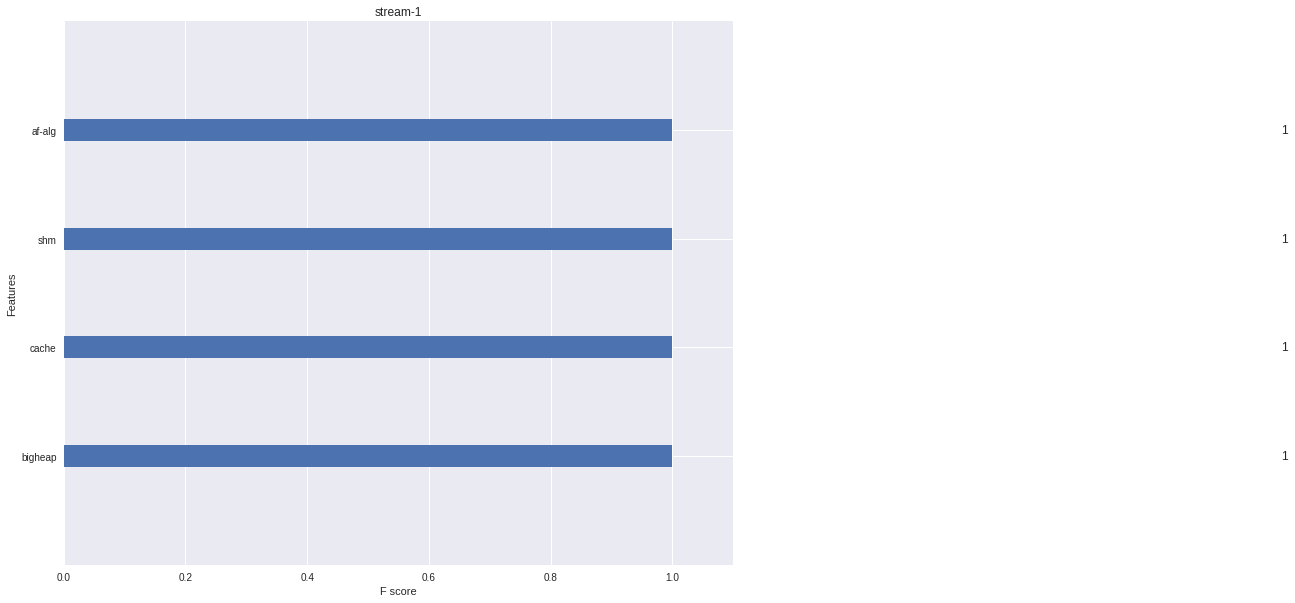

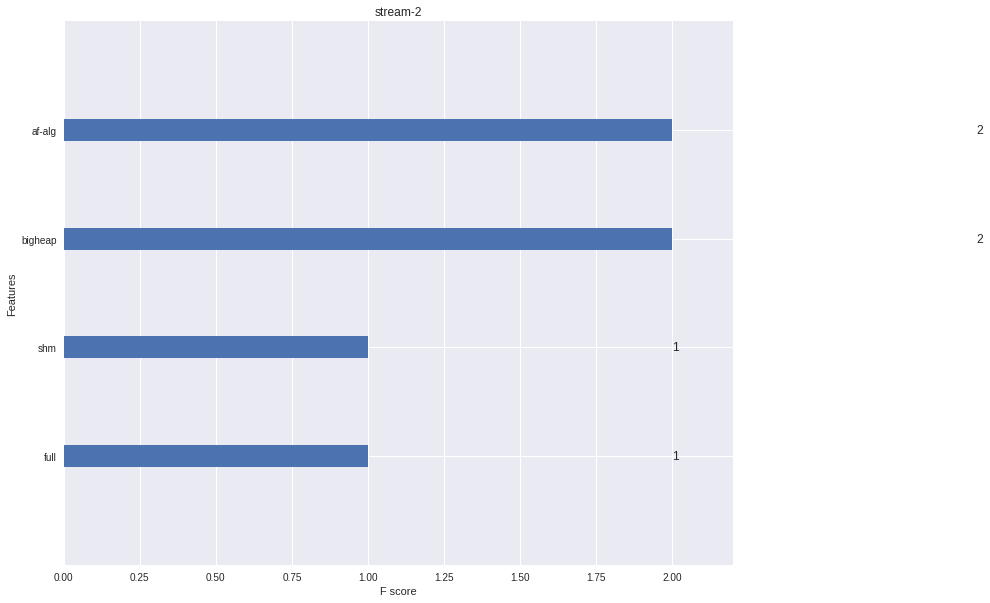

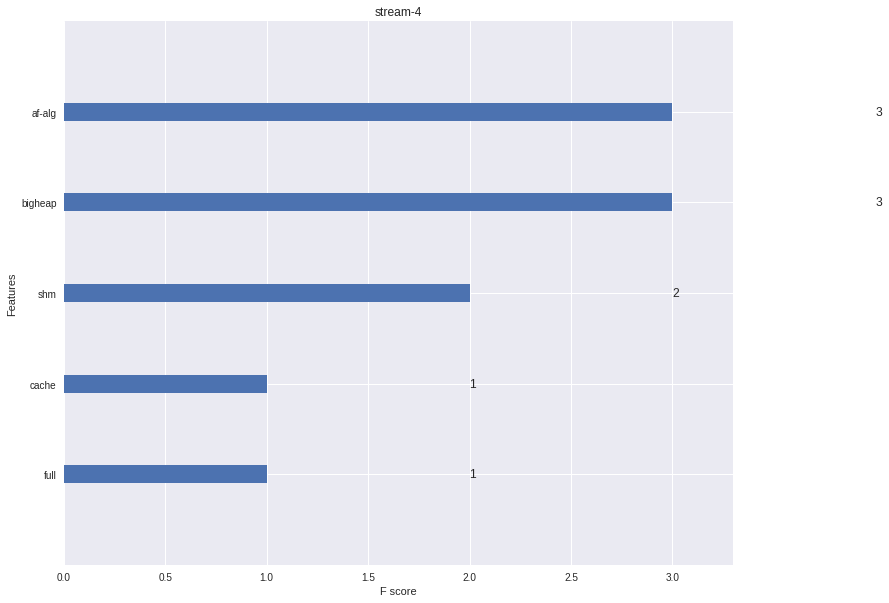

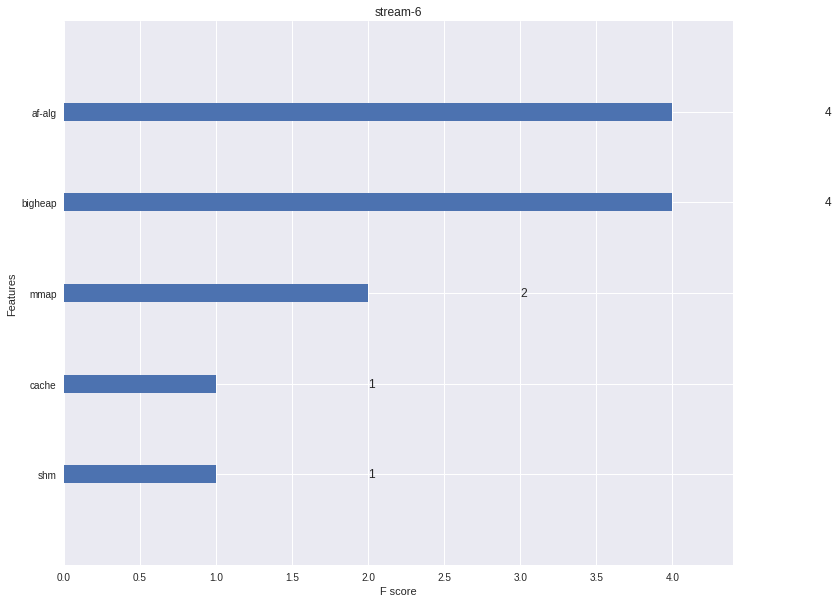

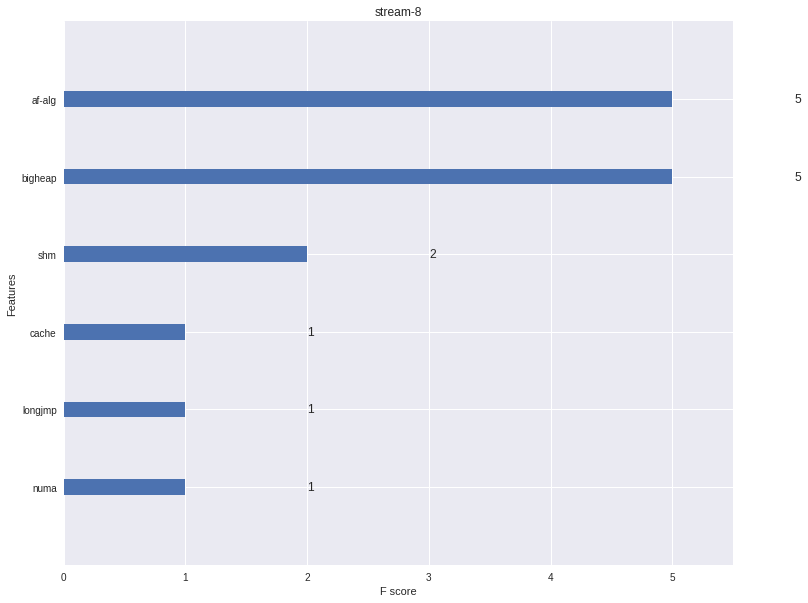

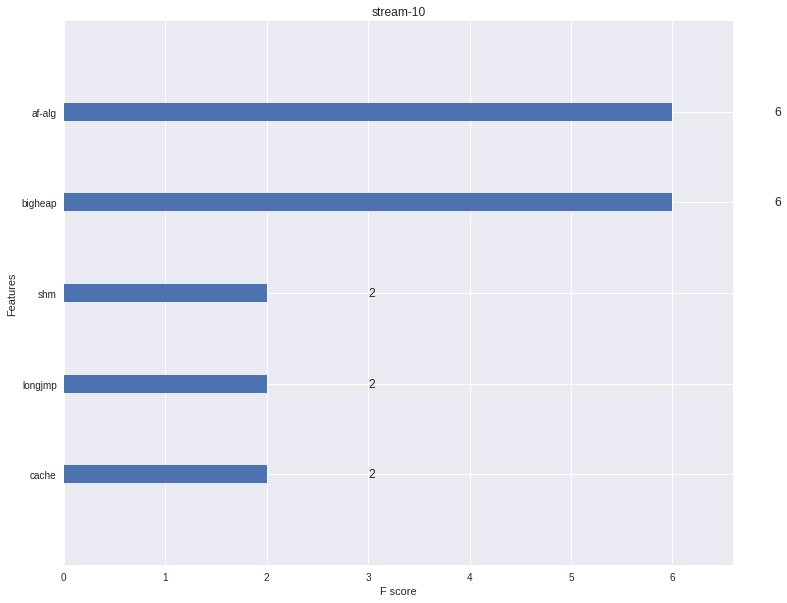

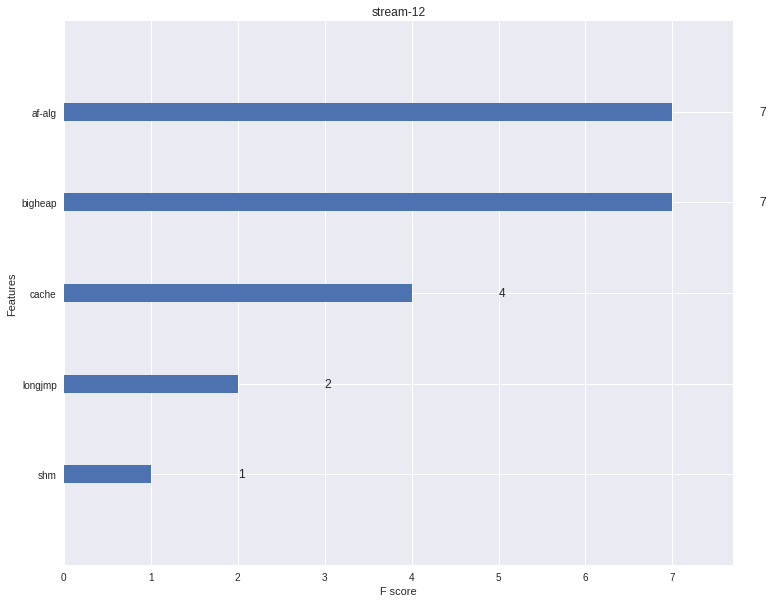

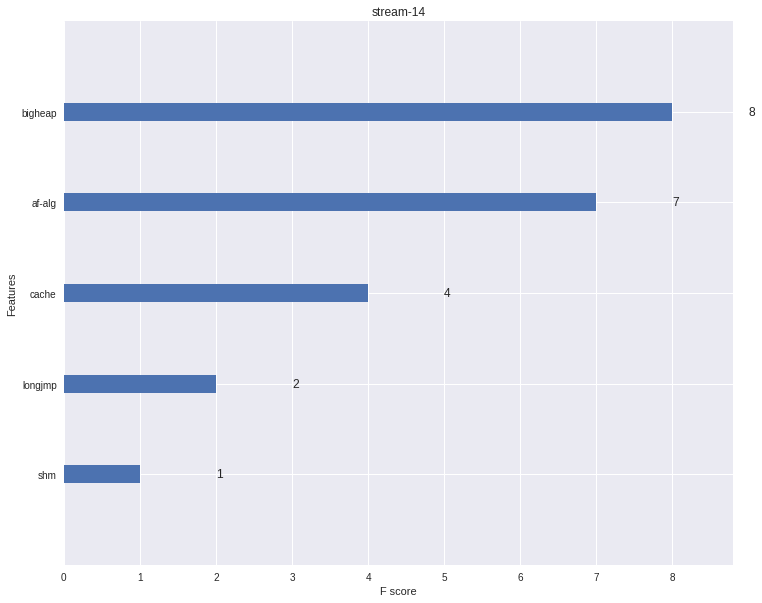

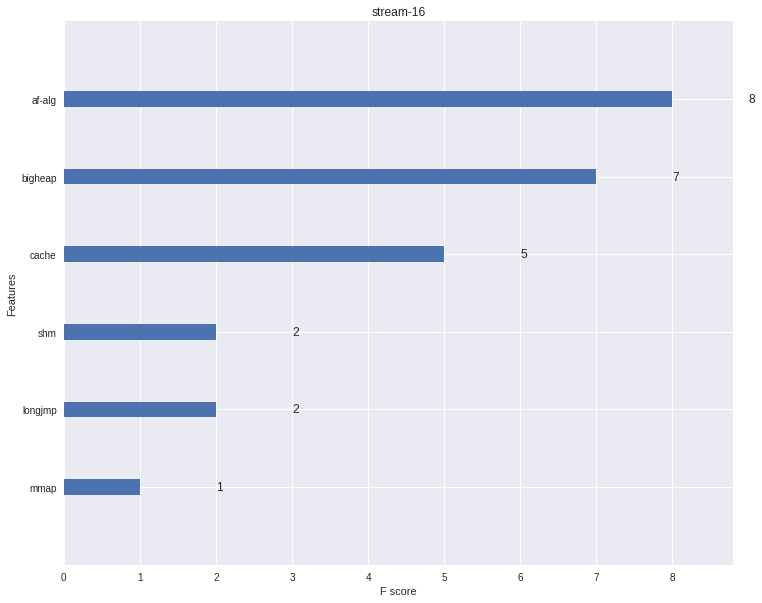

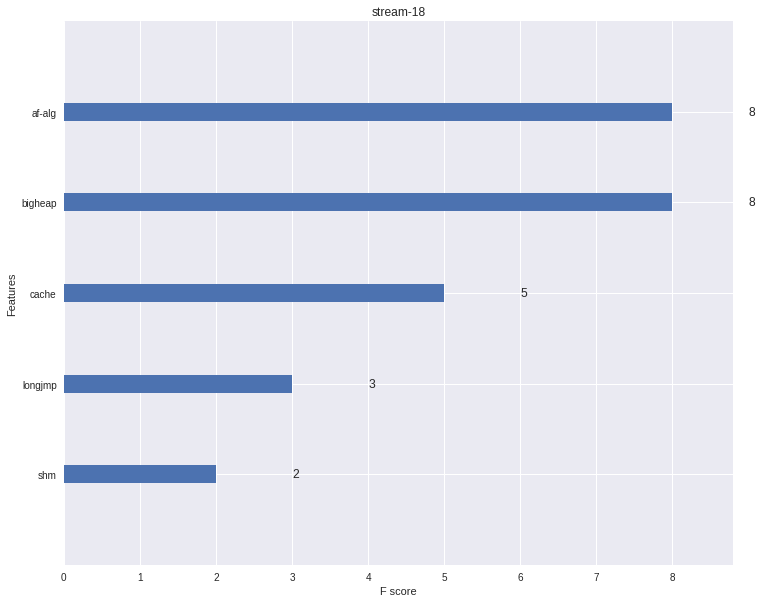

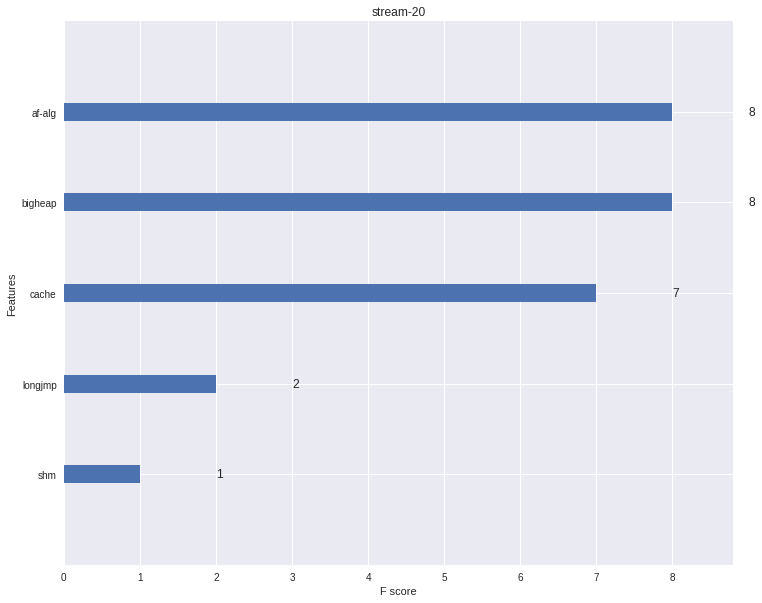

In [58]:
for b in ['stream-1', 'stream-2', 'stream-4', 'stream-6', 'stream-8', 'stream-10', 'stream-12', 'stream-14', 'stream-16', 'stream-18', 'stream-20']:
    T_train_xgb = xgb.DMatrix(features[most_relevant], features[b])
    params = {'bst:max_depth':6, 'bst:eta':1, 'gamma':15, 'objective':'reg:linear'}
    #params = {'bst:max_depth':6, 'bst:eta':1, 'gamma':15, 'booster':'gblinear', 'objective':'reg:linear' }
    params['nthread'] = 8
    params['eval_metric'] = 'mae'
    num_rounds=1000
    gbm = xgb.train(params,T_train_xgb,num_rounds)
    xgb.plot_importance(gbm)
    #xgb.plot_tree(gbm)
    plt.title(b)
    plt.show()